## Problem Statements
1. Perform Exploratory Data Analysis (EDA) tasks
a) Visualize the 10 random rows of the data set
b) Generate the description for numeric variables
c) Check the shape of the data set
d) Generate the correlation matrix
e) Generate a correlogram
2. Find out the minimum and maximum values for GRE score
3. Find out the percentage of universities for each university rating
4. Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :
Students having the “Chance of Admit” value > 0.80, are assigned value 1, and
Students having the “Chance of Admit” value < 0.80, are assigned value 0
Where 0: Low chance of Admission and 1: High chance of admission
5. Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.
6. Build a Random Forest classifier, to predict whether a student has a low or high chance of admission to a chosen university.
7. Compare all of the models and justify your choice about the optimum model.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
df1 = pd.read_csv('admission.csv')
df = df1.copy()
df1.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
453,454,319,103,3,2.5,4.0,8.76,1,0.73
34,35,331,112,5,4.0,5.0,9.80,1,0.94
203,204,334,120,5,4.0,5.0,9.87,1,0.97
380,381,322,104,3,3.5,4.0,8.84,1,0.78
421,422,321,112,3,3.0,4.5,8.95,1,0.77
416,417,315,104,3,4.0,2.5,8.10,0,0.65
36,37,299,106,2,4.0,4.0,8.40,0,0.64
463,464,304,107,3,3.5,3.0,7.86,0,0.57
331,332,311,105,2,3.0,2.0,8.12,1,0.73
253,254,335,115,4,4.5,4.5,9.68,1,0.93


In [4]:
df.shape

(500, 9)

### Data Preprocessing

In [5]:
nv = df.isnull().sum()
nv = nv[nv>0]
print(nv)

Series([], dtype: int64)


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop('Serial No.', axis=1, inplace=True)

#### Inference:
There are no nulls and duplicates in the data

In [8]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

### EDA

#### Correlation

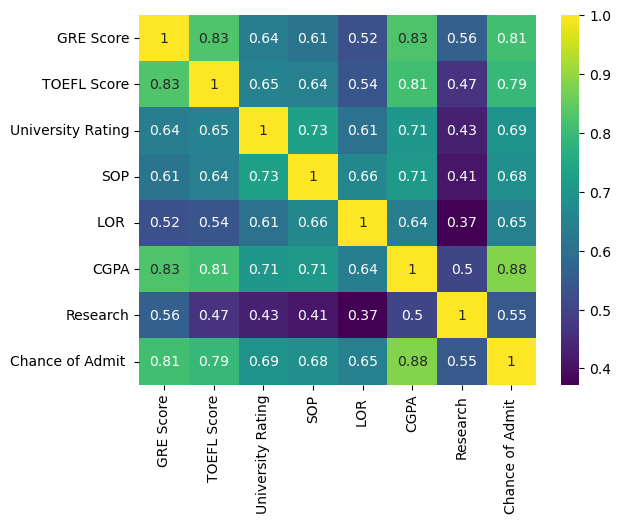

In [9]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

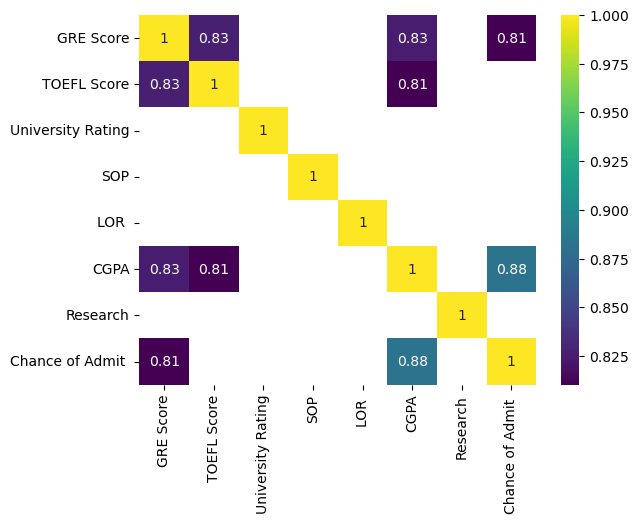

In [10]:
corr1 = corr[corr>0.8]
sns.heatmap(corr1, annot=True, cmap='viridis')
plt.show()

### inference:
1. GRE score and TOEFL score are highly correlated columns (0.83)
2. CGPA is highly correlated with GRE score, TOEFL score

In [11]:
for i in df.columns:
    print(f'Feature name:{i}')
    print(df[i].value_counts())
    print('*'*20)

Feature name:GRE Score
312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: GRE Score, dtype: int64
********************
Feature name:TOEFL Score
110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: TOEFL Score, dtype: int64
********************
Feature name:University Rating
3    162
2    126
4    105
5     73
1

#### Inference:
1. GRE Score, TOEFL Score, SOP, LOR, CGPA and Chance of Admit are continuous columns.
2. University Rating, Research are categorical columns and are already encoded. 

#### Boxplot

In [12]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
num_cols = ['GRE Score', 'TOEFL Score','SOP', 'LOR ', 'CGPA']

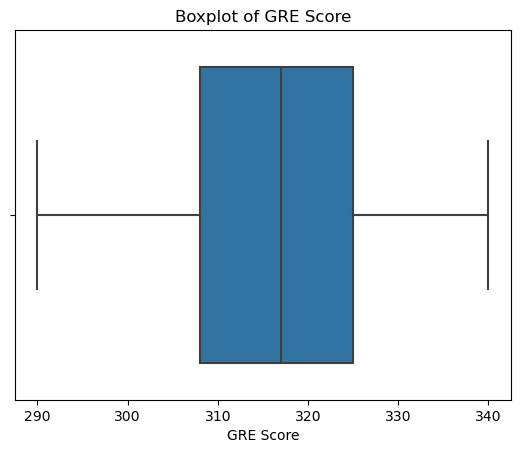

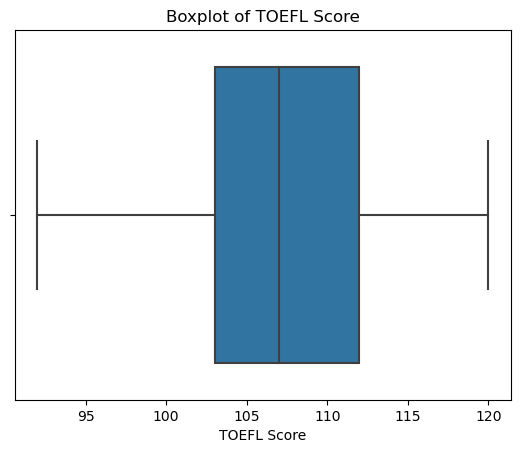

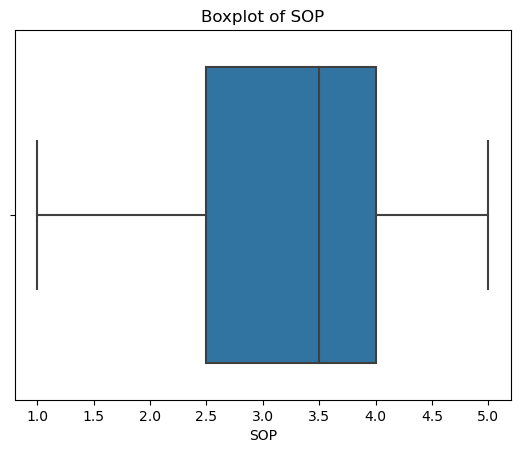

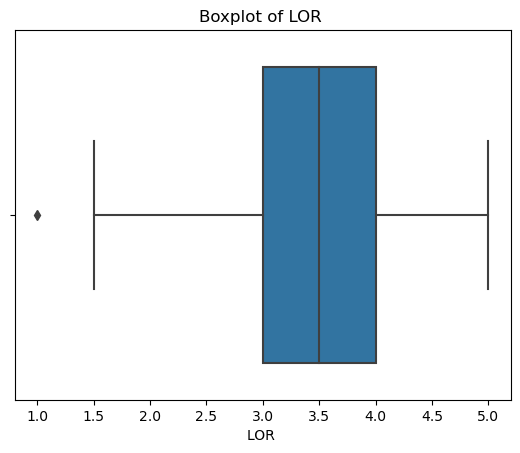

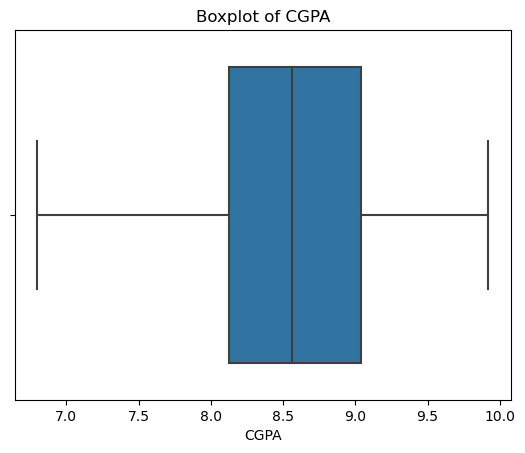

In [14]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

#### Inference:
There are outliers present in LOR

In [15]:
df.describe(percentiles=[0.01,0.03,0.05]).T

,count,mean,std,min,1%,3%,5%,50%,max
GRE Score,500.0,316.47200,11.295148,290.00,294.9900,296.9700,298.000,317.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,94.9900,97.0000,98.000,107.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,1.0000,1.0000,1.000,3.00,5.00
SOP,500.0,3.37400,0.991004,1.00,1.0000,1.5000,1.500,3.50,5.00
LOR,500.0,3.48400,0.925450,1.00,1.5000,2.0000,2.000,3.50,5.00
CGPA,500.0,8.57644,0.604813,6.80,7.2797,7.4597,7.638,8.56,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,0.0000,0.000,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.3799,0.4400,0.470,0.72,0.97


In [16]:
print(df[df['LOR ']<1.5].shape)

(1, 8)


In [17]:
outlier_row = df[df['LOR ']<1.5].index
df.drop(outlier_row, inplace=True)

#### Minimum and Maximum values of GRE score

In [18]:
print('Minimum GRE Score:',df['GRE Score'].min())
print('Maximum GRE Score:',df['GRE Score'].max())

Minimum GRE Score: 290
Maximum GRE Score: 340


#### Percentage of University per rank

In [19]:
uc = df['University Rating'].value_counts()
uc

3    162
2    126
4    105
5     73
1     33
Name: University Rating, dtype: int64

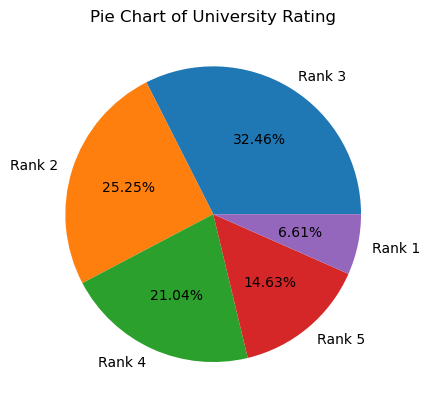

In [20]:
rank = ['Rank 3', 'Rank 2', 'Rank 4', 'Rank 5', 'Rank 1']
plt.pie(x=uc, autopct='%.2f%%', labels=rank)
plt.title('Pie Chart of University Rating')
plt.show()

### Encoding the target variable

In [21]:
# Students having the “Chance of Admit” value > 0.80, are assigned value 1, and
# Students having the “Chance of Admit” value < 0.80, are assigned value 0
# Where 0: Low chance of Admission and 1: High chance of admission

In [22]:
df['Chance of Admission'] = df['Chance of Admit '].map(lambda x: 1 if x>0.80 else 0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admission
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,0
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,0
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In [23]:
df.drop('Chance of Admit ', axis=1, inplace=True)

## Model Building

In [24]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admission'],
      dtype='object')

In [25]:
x = df.drop(['CGPA', 'Chance of Admission'], axis=1)
y = df['Chance of Admission']
print(x.shape)
print(y.shape)

(499, 6)
(499,)


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(374, 6)
(125, 6)
(374,)
(125,)


In [27]:
def model_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_scr = model.score(x_train,y_train)
    test_scr = model.score(x_test,y_test)
    print('Training score',train_scr)
    print('Testing score',test_scr)
    ypred = model.predict(x_test)
    print('Predictions',ypred)
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))
    res = {'Train Score': train_scr, 'Test Score': test_scr}
    return res

### Model 1: Logistic Regression

In [28]:
lr1 = LogisticRegression(max_iter = 100000)
lr1_res = model_metrics(lr1,x_train,x_test,y_train,y_test)
model1 = pd.DataFrame(lr1_res, index=['Logistic Regression'])

Training score 0.93048128342246
Testing score 0.912
Predictions [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1]
[[90  3]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        93
           1       0.89      0.75      0.81        32

    accuracy                           0.91       125
   macro avg       0.90      0.86      0.88       125
weighted avg       0.91      0.91      0.91       125



### Model 2: Decision Tree

In [29]:
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=20)
dt1_res = model_metrics(dt1,x_train,x_test,y_train,y_test)
model2 = pd.DataFrame(dt1_res, index=['Decision Tree'])

Training score 0.9438502673796791
Testing score 0.928
Predictions [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[[91  2]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        93
           1       0.93      0.78      0.85        32

    accuracy                           0.93       125
   macro avg       0.93      0.88      0.90       125
weighted avg       0.93      0.93      0.93       125



### Hyperparameter Tuning using GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold

In [31]:
hparams_dt = {'criterion':['gini', 'entropy'],
             'max_depth': list(range(4,12)),
             'min_samples_split':[8,10,12,14,15,17,20,22,24]}
bmodel = DecisionTreeClassifier()
kf = KFold(n_splits=5)
gs1 = GridSearchCV(estimator=bmodel, param_grid = hparams_dt, cv=kf, scoring='accuracy')
gs1.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_split': [8, 10, 12, 14, 15, 17, 20, 22,
                                               24]},
             scoring='accuracy')

In [32]:
print('Best Hyperparameters')
print(gs1.best_params_)
print(gs1.best_estimator_)

Best Hyperparameters
{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 12}
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=12)


In [33]:
gs1_res = model_metrics(gs1,x_train, x_test, y_train, y_test)
model3 = pd.DataFrame(gs1_res, index=['Decision Tree using GridSearchCV'])

Training score 0.9518716577540107
Testing score 0.904
Predictions [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[[90  3]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        93
           1       0.88      0.72      0.79        32

    accuracy                           0.90       125
   macro avg       0.90      0.84      0.87       125
weighted avg       0.90      0.90      0.90       125



### Model 3: Random Forest

In [34]:
rf1 = RandomForestClassifier(n_estimators=80, criterion='gini',max_depth=10,min_samples_split=30, n_jobs=-1)
rf1_res = model_metrics(rf1,x_train, x_test, y_train, y_test)
model4 = pd.DataFrame(rf1_res, index=['Random Forest'])

Training score 0.9385026737967914
Testing score 0.92
Predictions [0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
[[91  2]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        93
           1       0.92      0.75      0.83        32

    accuracy                           0.92       125
   macro avg       0.92      0.86      0.89       125
weighted avg       0.92      0.92      0.92       125



### Model 4: AdaBoost

In [35]:
adb1 = AdaBoostClassifier(n_estimators=80)
adb1_res = model_metrics(adb1,x_train,x_test,y_train,y_test)
model5 = pd.DataFrame(adb1_res, index=['AdaBoost'])

Training score 0.9438502673796791
Testing score 0.904
Predictions [0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
[[89  4]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        93
           1       0.86      0.75      0.80        32

    accuracy                           0.90       125
   macro avg       0.89      0.85      0.87       125
weighted avg       0.90      0.90      0.90       125



### Model 5: XGBoost

In [36]:
xgb1 = XGBClassifier(objective='binary:logistic',eval_metric='logloss', n_estimators=80,max_depth=4,reg_lambda=0.2,eta=0.3,gamma=0.5,random_state=30)
xgb1_res = model_metrics(xgb1,x_train,x_test,y_train,y_test)
model6 = pd.DataFrame(xgb1_res, index=['XGBoost'])

Training score 0.9572192513368984
Testing score 0.912
Predictions [0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1]
[[90  3]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        93
           1       0.89      0.75      0.81        32

    accuracy                           0.91       125
   macro avg       0.90      0.86      0.88       125
weighted avg       0.91      0.91      0.91       125



### Final Result

In [37]:
res = pd.concat([model1, model2, model3, model4, model5, model6])
res

,Train Score,Test Score
Logistic Regression,0.930481,0.912
Decision Tree,0.943850,0.928
Decision Tree using GridSearchCV,0.951872,0.904
Random Forest,0.938503,0.920
AdaBoost,0.943850,0.904
XGBoost,0.957219,0.912


#### Inference:
The best results are given by XGBoost model and Hypertuned Decision Tree